

# Project: Investigate a Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The following dataset contains information for 100.000 medical appointments in Brazil, between november of 2015 and june of 2016. The dataset contains information of the appointment, characteristics of the patient and if they showed up the scheduled day or not.<br>
Our main focus is going will be on the next independent variables: alcoholism, handcap and scholarship.<br>
I decided to exclude diabetes and hypertension as variables just because they don't draw my attention, and the use of sms just because it is more of an external reason rather than a characteristic of the patient.
The present report will address the following questions:<br>

1.Is any of the independent variables influential in the end result of the appointment?<br>
<br>
2.Are variables independent from each other? More specifically, does scholarship influence alcoholism levels in the dataset?


First of all, let's import all the necessary packages for our analysis: Pandas, Numpy and MatPlotLib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Next, let's load our dataset and have a first view of it.

In [2]:
dfnoshow = pd.read_csv("noshowbrazil2016.csv")
dfnoshow.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [3]:
dfnoshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Let's Analyze the datatypes for every column, search for duplicated rows and null values

In [4]:
dfnoshow.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
dfnoshow.duplicated().sum()

0

In [6]:
dfnoshow.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64



### Data Cleaning and Datatype modification

As we can see, there are no duplicated rows nor null values in our dataset.
On the other hand, a few issues with the data are indeed present:<br>
1-the handcap column, which represents a boolean as (0,1), but has values up to 4<br>
2-The age column has negative values<br>
3-Some datatypes are not usuful and we are going to modify them: From objects to Datetime and from int64 to Boolean


In [7]:
#this line proves that we have unwanted values in this column
dfnoshow["Handcap"].unique()

array([0, 1, 2, 3, 4])

In [8]:
#the following lines remove unwanted results for age and handcapness
dfnoshow = dfnoshow[dfnoshow["Handcap"]<2]
dfnoshow = dfnoshow[dfnoshow["Age"]>0]

In [9]:
dfnoshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.067880e+05,1.067880e+05,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000
mean,1.473131e+14,5.675428e+06,38.299294,0.101051,0.203356,0.073978,0.031389,0.019113,0.323426
std,2.558722e+14,7.133632e+04,22.453253,0.301397,0.402497,0.261737,0.174368,0.136922,0.467786
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.175523e+12,5.640484e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173700e+13,5.680740e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433654e+13,5.725627e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#This line changes datatype for time related values and booleans. Although we won't use them in our analysis, this is a good practice
dfnoshow["ScheduledDay"] = dfnoshow["ScheduledDay"].apply(lambda x: pd.to_datetime(x,format = "%Y-%m-%dT%H:%M:%SZ"))
dfnoshow["AppointmentDay"] = dfnoshow["AppointmentDay"].apply(lambda x: pd.to_datetime(x,format = "%Y-%m-%dT%H:%M:%SZ"))
dfnoshow = dfnoshow.astype({"Scholarship": "bool", "Hipertension": "bool", "Diabetes": "bool", "Alcoholism": "bool", "Handcap": "bool", "SMS_received": "bool"})
dfnoshow.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                 bool
Hipertension                bool
Diabetes                    bool
Alcoholism                  bool
Handcap                     bool
SMS_received                bool
No-show                   object
dtype: object

In [11]:
dfnoshow.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,False,True,False,False,False,False,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,False,False,False,False,False,False,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,False,False,False,False,False,False,Yes
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,False,False,False,False,False,False,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,False,False,False,False,False,False,No


In [12]:
#for consistency, we are going to format all the letters to lowercase and delete the - characters
dfnoshow.rename(columns = lambda x: x.lower().replace("-","") , inplace = True)
dfnoshow.head(10)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,noshow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,False,True,False,False,False,False,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,False,False,False,False,False,False,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,False,False,False,False,False,False,Yes
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,False,False,False,False,False,False,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,False,False,False,False,False,False,No


In [13]:
#this is used in the intro, minimum and max value for scheduled day
dfnoshow["scheduledday"].min()

Timestamp('2015-11-10 07:13:56')

In [14]:
dfnoshow["scheduledday"].max()

Timestamp('2016-06-08 20:07:23')

<a id='eda'></a>
## Exploratory Data Analysis
First, let's see the distribution of our independent variables in the dataset



Text(0,0.5,'')

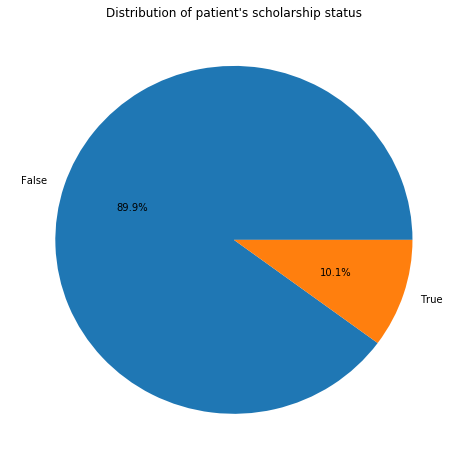

In [15]:
#plots scholarship proportion in the dataset for each status
dfnoshow["scholarship"].value_counts(normalize = True).apply(lambda x: x*100).plot(kind = "pie", figsize = [8,8], autopct ='%.1f%%')
plt.title("Distribution of patient's scholarship status")
plt.ylabel("")

Text(0,0.5,'')

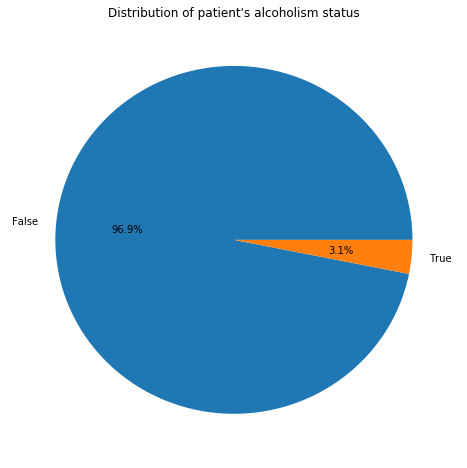

In [16]:
#plots alcoholism proportion in the dataset for each status
dfnoshow["alcoholism"].value_counts(normalize = True).apply(lambda x: x*100).plot(kind = "pie", figsize = [8,8], autopct ="%.1f%%")
plt.title("Distribution of patient's alcoholism status")
plt.ylabel("")

Text(0,0.5,'')

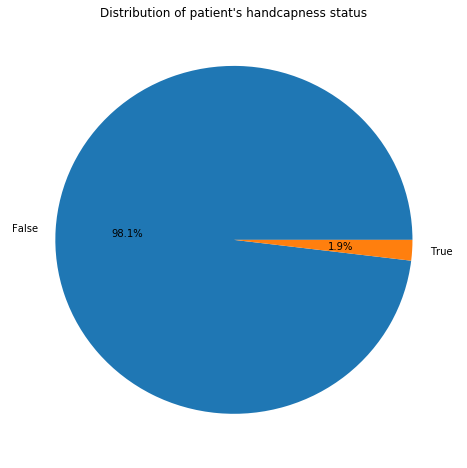

In [17]:
#plots handcap proportion in the dataset for each status
dfnoshow["handcap"].value_counts(normalize = True).apply(lambda x: x*100).plot(kind = "pie", figsize = [8,8], autopct ="%.1f%%")
plt.title("Distribution of patient's handcapness status")
plt.ylabel("")

### Is any of the independent variables influential in the end result of the appointment?
Our first question has to do with the distribution of explanatory variables in the end result of the appointment. ¿Does scholarship, alcoholism or handcapness a indicator of lower rates of presentation to appointments?<br>
Plotting these variables is going to prove if there's any difference between these distributions

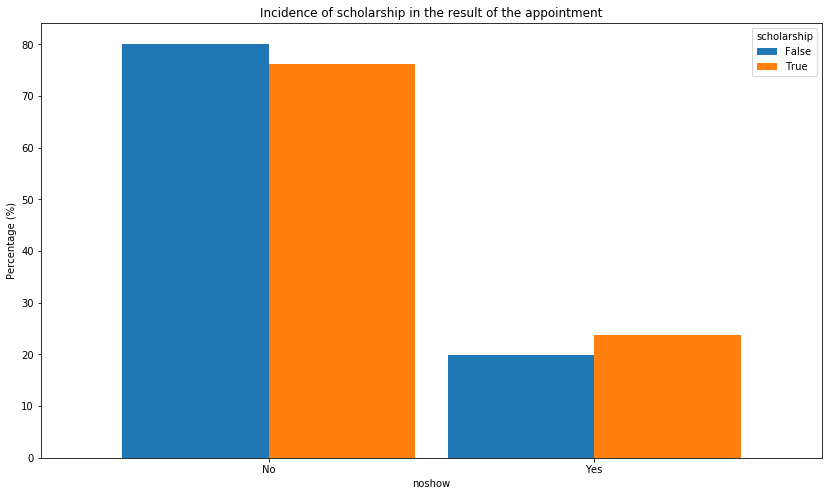

In [18]:
#this shows the distribution of scholarship for both results of the appointments
#for efficiency, let's define a function for our plotting requirements.
def bar_plotter(column):
    dfnoshow.groupby(["noshow",column]).size().unstack().apply(lambda x : 100*x/x.sum()).plot(kind = "bar", rot = 0, figsize = [14,8], width = 0.9)
    plt.title("Incidence of {} in the result of the appointment".format(column))
    plt.ylabel("Percentage (%)")
bar_plotter("scholarship")

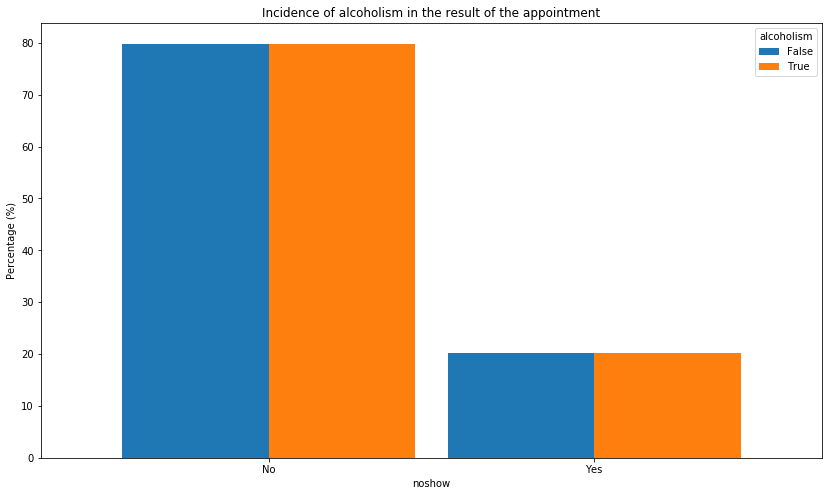

In [19]:
#this shows the distribution of alcoholism for both results of the appointments
bar_plotter("alcoholism")

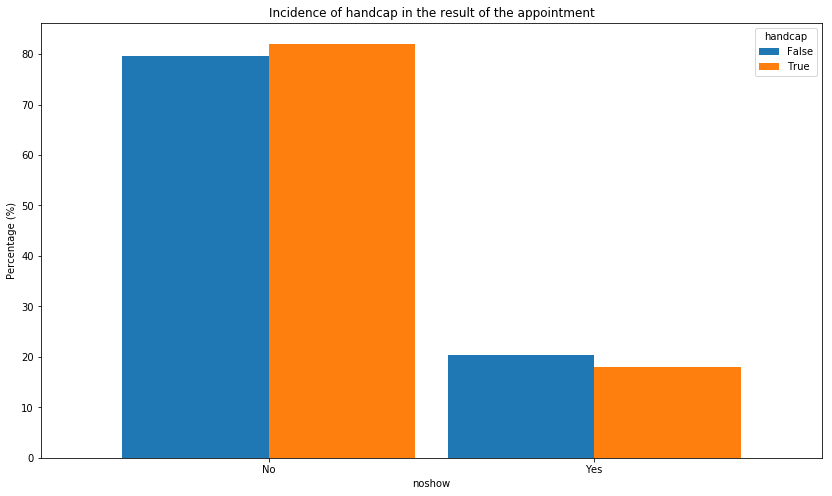

In [20]:
#this shows the distribution of handcapness for both results of the appointments
bar_plotter("handcap")

These results show us that there is a higher chance of showing up to the appointment if the person does not have a degree, or if they do have any kind of handcap. Interestingly, alcoholism rates are the same for both appointment results.

###  Are variables independent from each other?
Secondly, we are going to investigate if the variables for our study are independent from each other. This is an interesting question, because the weight of each variable in a predictive model would be not correct if the variables are not independent. More specifically, our main concern is if scholarship influentiates alcoholism levels

In [21]:
#this table shows the correlation between variables
dfnoshow.corr().drop(index = ["patientid","appointmentid","age","hipertension","diabetes"], columns =["patientid","appointmentid","age","hipertension","diabetes"])

,scholarship,alcoholism,handcap,sms_received
scholarship,1.000000,0.033727,-0.010494,-0.000006
alcoholism,0.033727,1.000000,0.002328,-0.027338
handcap,-0.010494,0.002328,1.000000,-0.025017
sms_received,-0.000006,-0.027338,-0.025017,1.000000


No variables have a strong correlation between each other, which is a good indicator of our dataset. Now let's see if alcoholism rates are different depending on the scholarship status.

In [ ]:
#this plots the alcoholism levels for each scholarship sta
dfnoshow.groupby(["scholarship","alcoholism"]).size().unstack().apply(lambda x : 100*x/x.sum()).plot(kind = "bar", rot = 0, figsize = [14,8], width = 0.9)
plt.title("Percentage of alcoholism for each scholarship status")
plt.ylabel("Percentage (%)")

As we can see, the alcoholism rate is higher in professionals, which doesn't imply causality.<br>

<a id='conclusions'></a>
## Conclusions
Our data shows information from over 100.000 appointments in Brazil. Overall the data was correct, except for a few errors in the columns age and handcap. No repeated rows or null values were present in the dataset.<br> 
<br>
The first point of the analysis was related to the incidencce of scholarship, education and handcapness in the result of the appointment. A counterintuitive result was found: The porcentage of no show appointment is higher in professional than in people with no degree. Nevertheless, the age limitation in our study might be the reason for this difference.<br>
<br>
Regarding to correlation between variables (scholarship, alcoholism and handcap) it is possible to notice that there are no strong relationships between any of them. Although, we found different levels of alcoholism for both status of scholarship, more specifically, higher levels of alcoholism among professionals. Again, this in counterintuitive at first, but it might be due to one of the limitations of our study: we did not consider age as an element for our analysis.<br>
<br>
The limitations of our analysis are varied. First, working with samples implies uncertainty. For example, we cannot define if this tendency has always/will always be the same, as we are working only with a few months of data. Moreover, we have no information with respect to the collection of data, which might bias our study. Proof of that is the unexpected values for the variable "handcap", up to 4, for an integer representing a boolean.<br>
<br>
Considering that our data only show information for appointments, it is not possible to tell if the correlation between variables implies causality in a group of population. All of our findings only apply to patients scheduling appointments. Moreover, no statistical inference was performed. This could help to corroborate or deny our findings <br>
<br>

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])